PCA for Data Visualization

In [1]:
import pandas as pd

df = pd.read_csv(
    'C:/Users/TheAncientOwl/Code/data-analysis-tool/server/Date.csv')

df.head()

,Country,EA,EAM,EAF,AFF,ANE,AME,CY,SA,CP,LA,LCP,ARL,AGL
0,Aruba,24.125617,25.060201,22.962485,10.503020,13471.23596,20695.5618,3656.505885,180.0,17824090.07,180.0,4600273.024,2000.0,20.00
1,Afghanistan,43.130001,37.259998,65.769997,22.042897,4300.00000,10450.0000,2164.900000,652860.0,4140568.00,652860.0,1912634.000,7703000.0,379190.00
2,Albania,37.290001,33.720001,42.279999,18.440931,960.00000,2010.0000,4840.500000,28750.0,678196.00,27400.0,140110.000,611346.0,11740.81
3,Andorra,24.125617,25.060201,22.962485,10.503020,0.00000,0.0000,3656.505885,470.0,17824090.07,470.0,4600273.024,830.0,188.30
4,Armenia,25.780001,23.400000,28.650000,13.942312,1070.00000,680.0000,2623.600000,29740.0,334342.00,28470.0,127436.000,445600.0,16773.00


1. Standardize the data

In [3]:
from sklearn.preprocessing import StandardScaler

features = ['EA', 'EAM', 'EAF', 'AFF', 'ANE', 'AME', 'CY', 'SA', 'CP', 'LA', 'LCP', 'ARL', 'AGL']
target = ['Country']

x = df.loc[:, features].values
y = df.loc[:, target].values

x = StandardScaler().fit_transform(x)

2. PCA Projection to 2D

In [7]:
from sklearn.decomposition import PCA

components_count = 2
components_labels = [f'PC{x}' for x in range(1, components_count + 1)]

pca = PCA(n_components=components_count)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components, columns=components_labels)

final_df = pd.concat([principal_df, df[target]], axis=1)

final_df.head()

,PC1,PC2,Country
0,0.687514,1.366378,Aruba
1,4.518981,-1.151856,Afghanistan
2,-0.501471,-2.034472,Albania
3,-0.736814,0.007391,Andorra
4,-1.076313,-1.619261,Armenia


3. Visualize 2D Projection

Text(0.5, 1.0, '2 component PCA')

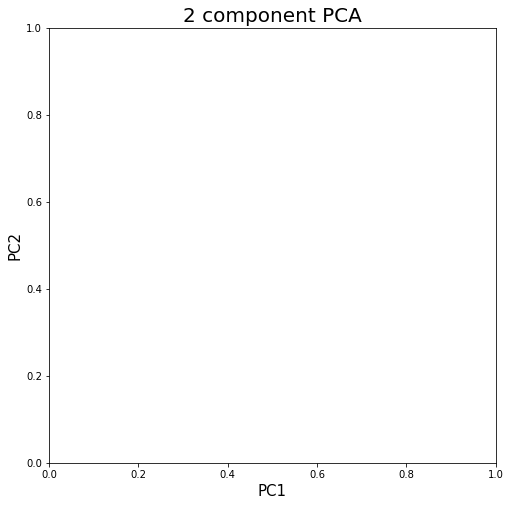

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# for target in targets:
#   indicesToKeep = final_df['Country'] == target
#   ax.scatter(final_df.loc[indicesToKeep, 'PC1'], 
#              final_df.loc[indicesToKeep, 'PC2'],
#              c='b', s=50)

# ax.grid()
